In [1]:
import re
import math
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
corpus = [
    "I love this movie",
    "This movie is great",
    "I hate this boring movie",
    "What a terrible film",
    "The best movie ever made"
]

In [4]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus)

In [5]:
bow_matrix.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]])

In [6]:
vectorizer.get_feature_names_out()

array(['best', 'boring', 'ever', 'film', 'great', 'hate', 'is', 'love',
       'made', 'movie', 'terrible', 'the', 'this', 'what'], dtype=object)

In [7]:
vectorizer.vocabulary_

{'hate': 5,
 'this': 12,
 'boring': 1,
 'movie': 9,
 'love': 7,
 'what': 13,
 'terrible': 10,
 'film': 3,
 'the': 11,
 'best': 0,
 'ever': 2,
 'made': 8,
 'is': 6,
 'great': 4}

In [8]:
df_bow = pd.DataFrame(
    bow_matrix.toarray(),
    columns = vectorizer.get_feature_names_out(),
    index= [f'문서{i+1}' for i in range(len(corpus))]
)
df_bow

,best,boring,ever,film,great,hate,is,love,made,movie,terrible,the,this,what
문서1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
문서2,0,0,0,0,0,0,0,1,0,1,0,0,1,0
문서3,0,0,0,1,0,0,0,0,0,0,1,0,0,1
문서4,1,0,1,0,0,0,0,0,1,1,0,1,0,0
문서5,0,0,0,0,1,0,1,0,0,1,0,0,1,0


In [9]:
bow_matrix.shape

(5, 14)

In [10]:
# sparse : BoW, TF-IDF : 빈도
# dense :  word2vc, bert : 값

In [11]:
# (100000000, 1000) -> PCA, t-SNE 차원축소

In [156]:
corpus = [
    "I love this movie",
    "This movie is great",
    "I hate this boring movie",
    "What a terrible film",
    "The best movie ever made"
]

In [157]:
tokenized = [doc.lower().split() for doc in corpus]
tokenized

[['i', 'love', 'this', 'movie'],
 ['this', 'movie', 'is', 'great'],
 ['i', 'hate', 'this', 'boring', 'movie'],
 ['what', 'a', 'terrible', 'film'],
 ['the', 'best', 'movie', 'ever', 'made']]

In [13]:
def manual_bow(corpus):
    # 문서들을 Lower() 소문자 변환
    # tokenize
    # vocabulary 구축
    # 각 문서들을 빈도 벡터로 변환
    
    tokenized = [doc.lower().split() for doc in corpus]
    vocab = sorted(set(w for doc in tokenized for w in doc))
    word2idx ={w: i for i, w in enumerate(vocab)}
    
    vectors = []
    for doc in tokenized:
        vec = [0] * len(vocab)
        for word in doc:
            vec[word2idx[word]] += 1
        vectors.append(vec)
    
    return vocab, vectors

In [158]:
corpus

['I love this movie',
 'This movie is great',
 'I hate this boring movie',
 'What a terrible film',
 'The best movie ever made']

In [159]:
vocab, vectors = manual_bow(corpus)
vectors

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]]

In [15]:
pd.DataFrame(vectors, columns=vocab, index=[f'Doc{i+1}' for i in range(len(corpus))])

,a,best,boring,ever,film,great,hate,i,is,love,made,movie,terrible,the,this,what
Doc1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0
Doc2,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
Doc3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
Doc4,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0
Doc5,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [16]:
corpus = {
    "I love this movie",
    "I hate this movie",
    "This movie is not bad"
}

In [17]:
for n, name in [(1, "Unigram"), (2, "Bigram")]:
    ngram = (n,n)
    vec = CountVectorizer(ngram_range=ngram)
    matrix = vec.fit_transform(corpus)
    df = pd.DataFrame(matrix.toarray(), columns= vec.get_feature_names_out())
    print(df)

   bad  hate  is  love  movie  not  this
0    0     0   0     1      1    0     1
1    1     0   1     0      1    1     1
2    0     1   0     0      1    0     1
   hate this  is not  love this  movie is  not bad  this movie
0          0       0          1         0        0           1
1          0       1          0         1        1           1
2          1       0          0         0        0           1


In [165]:
corpus = [
    ["the", "cat", "sat", "on", "the", "mat"],
    ["the", "dog", "played", "in", "the", "park"],
    ["the", "cat", "played", "with", "the", "dog"]
]

In [169]:
def compute_tf(doc):
    tf = {}
    for word in doc:
        tf[word] = tf.get(word, 0) + 1
    for word in tf:
        tf[word] /= len(doc)

    return tf

In [170]:
def compute_idf(corpus):
    n_docs = len(corpus)
    all_words = set(w for doc in corpus for w in doc)
    idf = {}
    for word in all_words:
        doc_count = sum(1 for doc in corpus if word in doc)
        idf[word] = math.log(n_docs / (1+doc_count))
        
    return idf

In [171]:
tf_list = [compute_tf(doc) for doc in corpus]
tf_list

[{'the': 0.3333333333333333,
  'cat': 0.16666666666666666,
  'sat': 0.16666666666666666,
  'on': 0.16666666666666666,
  'mat': 0.16666666666666666},
 {'the': 0.3333333333333333,
  'dog': 0.16666666666666666,
  'played': 0.16666666666666666,
  'in': 0.16666666666666666,
  'park': 0.16666666666666666},
 {'the': 0.3333333333333333,
  'cat': 0.16666666666666666,
  'played': 0.16666666666666666,
  'with': 0.16666666666666666,
  'dog': 0.16666666666666666}]

In [172]:
idf = compute_idf(corpus)
idf

{'the': -0.2876820724517809,
 'on': 0.4054651081081644,
 'park': 0.4054651081081644,
 'in': 0.4054651081081644,
 'played': 0.0,
 'mat': 0.4054651081081644,
 'with': 0.4054651081081644,
 'dog': 0.0,
 'cat': 0.0,
 'sat': 0.4054651081081644}

In [43]:
vocab = sorted(idf.keys())

In [44]:
sorted(idf.keys())

['cat', 'dog', 'inthe', 'mat', 'on', 'park', 'played', 'sat', 'the', 'with']

In [45]:
tfidf_matrix = []
for tf in tf_list:
    row = [tf.get(w, 0) * idf[w] for w in vocab]
    tfidf_matrix.append(row)

In [46]:
df_tfdif = pd.DataFrame(tfidf_matrix, columns=vocab, index = ["Doc1", "Doc2", "Doc3"])
df_tfdif

,cat,dog,inthe,mat,on,park,played,sat,the,with
Doc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
Doc2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
Doc3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0


In [173]:
corpus = [
    "머신러닝은 인공지능의 한 분야입니다.",
    "딥러닝은 머신러닝의 한 종류입니다.",
    "자연어처리는 텍스트 데이터를 다루는 기술입니다.",
    "컴퓨터비전은 이미지 데이터를 다루는 기술입니다.",
    "강화학습은 보상을 통해 학습하는 방법입니다."
]

In [174]:
tfidf = TfidfVectorizer()
matrix = tfidf.fit_transform(corpus)

In [176]:
df_tfidf = pd.DataFrame(
    matrix.toarray(),
    columns = tfidf.get_feature_names_out(),
    index = [f"Doc{i+1}" for i in range(len(corpus))]
)

df_tfidf

,강화학습은,기술입니다,다루는,데이터를,딥러닝은,머신러닝은,머신러닝의,방법입니다,보상을,분야입니다,이미지,인공지능의,자연어처리는,종류입니다,컴퓨터비전은,텍스트,통해,학습하는
Doc1,0.000000,0.000000,0.000000,0.000000,0.00000,0.57735,0.00000,0.000000,0.000000,0.57735,0.00000,0.57735,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000
Doc2,0.000000,0.000000,0.000000,0.000000,0.57735,0.00000,0.57735,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.57735,0.00000,0.00000,0.000000,0.000000
Doc3,0.000000,0.405801,0.405801,0.405801,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.50298,0.00000,0.00000,0.50298,0.000000,0.000000
Doc4,0.000000,0.405801,0.405801,0.405801,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.50298,0.00000,0.00000,0.00000,0.50298,0.00000,0.000000,0.000000
Doc5,0.447214,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.447214,0.447214,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.447214,0.447214


In [177]:
df_tfidf.round(3)

,강화학습은,기술입니다,다루는,데이터를,딥러닝은,머신러닝은,머신러닝의,방법입니다,보상을,분야입니다,이미지,인공지능의,자연어처리는,종류입니다,컴퓨터비전은,텍스트,통해,학습하는
Doc1,0.000,0.000,0.000,0.000,0.000,0.577,0.000,0.000,0.000,0.577,0.000,0.577,0.000,0.000,0.000,0.000,0.000,0.000
Doc2,0.000,0.000,0.000,0.000,0.577,0.000,0.577,0.000,0.000,0.000,0.000,0.000,0.000,0.577,0.000,0.000,0.000,0.000
Doc3,0.000,0.406,0.406,0.406,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.503,0.000,0.000,0.503,0.000,0.000
Doc4,0.000,0.406,0.406,0.406,0.000,0.000,0.000,0.000,0.000,0.000,0.503,0.000,0.000,0.000,0.503,0.000,0.000,0.000
Doc5,0.447,0.000,0.000,0.000,0.000,0.000,0.000,0.447,0.447,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.447,0.447


In [178]:
for i, doc in enumerate(corpus):
    scores = matrix[i].toarray().flatten()
    top_indices = scores.argsort()[::-1][:3]
    top_words = [(tfidf.get_feature_names_out()[j], scores[j]) for j in top_indices]
    print(f"Doc {i+1} : {top_words}")

Doc 1 : [('인공지능의', np.float64(0.5773502691896258)), ('분야입니다', np.float64(0.5773502691896258)), ('머신러닝은', np.float64(0.5773502691896258))]
Doc 2 : [('머신러닝의', np.float64(0.5773502691896258)), ('종류입니다', np.float64(0.5773502691896258)), ('딥러닝은', np.float64(0.5773502691896258))]
Doc 3 : [('자연어처리는', np.float64(0.5029796600534002)), ('텍스트', np.float64(0.5029796600534002)), ('데이터를', np.float64(0.40580082271361156))]
Doc 4 : [('이미지', np.float64(0.5029796600534001)), ('컴퓨터비전은', np.float64(0.5029796600534001)), ('데이터를', np.float64(0.4058008227136115))]
Doc 5 : [('학습하는', np.float64(0.4472135954999579)), ('통해', np.float64(0.4472135954999579)), ('보상을', np.float64(0.4472135954999579))]


In [49]:
positive = [
    "이 영화 정말 재미있어요 강추합니다",
    "배우들의 연기가 훌륭했습니다",
    "스토리가 탄탄하고 감동적이에요",
    "올해 본 영화 중 최고입니다",
    "다시 보고 싶은 명작이에요",
    "웃음과 감동이 있는 좋은 영화",
    "연출이 뛰어나고 음악도 좋았어요",
    "가족과 함께 보기 좋은 영화입니다",
    "기대 이상으로 재미있었습니다",
    "배우의 열연에 감동했습니다"
]
negative = [
    "시간 낭비였습니다 별로예요",
    "스토리가 너무 지루하고 재미없어요",
    "연기가 어색하고 개연성이 없습니다",
    "이런 영화에 돈을 쓰다니 후회됩니다",
    "최악의 영화 두 번 다시 안 봅니다",
    "기대했는데 실망이 큽니다",
    "내용도 없고 지루하기만 합니다",
    "돈이 아깝습니다 비추천이에요",
    "줄거리가 뻔하고 감동이 없어요",
    "시간과 돈이 아깝습니다"
]


In [52]:
texts = positive + negative
labels = [1] * len(positive) + [0] * len(negative)

In [53]:
labels

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [55]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
clf = LogisticRegression(max_iter= 1000)
clf.fit(X, labels)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [70]:
new_texts = ['영화 너무 재미 있어요', '너무 지루하고 별로에요', '그냥 그저 그래요', '웃김 하지만 감동 없음']
new_X = vectorizer.transform(new_texts)

In [71]:
new_X.shape

(4, 64)

In [72]:
preds = clf.predict(new_X)
preds

array([0, 0, 0, 0])

In [73]:
probs = clf.predict_proba(new_X)
probs

array([[0.50173575, 0.49826425],
       [0.57645632, 0.42354368],
       [0.50057209, 0.49942791],
       [0.50057209, 0.49942791]])

In [126]:
train_texts = [
    "정말 좋은 제품입니다", "최고예요 강추", "만족합니다 좋아요",
    "품질이 좋고 배송도 빨라요", "가성비 최고",
    "별로입니다 실망", "품질이 나쁩니다", "다신 안 삽니다",
    "돈 낭비입니다", "최악의 제품"
]
train_labels = [1,1,1,1,1,0,0,0,0,0]

In [181]:
def build_sentiment_classifier(train_texts, train_labels):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(train_texts)
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit(X, train_labels)
    return vectorizer, classifier

def predict_sentiment(text, vectorizer, classifier):
    single = isinstance(text, str)
    texts = [text] if single else list(text)
    X = vectorizer.transform(texts)
    preds = classifier.predict(X)
    probs = classifier.predict_proba(X)
    if single:
        pred = int(preds[0])
        prob = float(probs[0][pred])
        return pred, prob
    return preds.tolist(), probs.tolist()

In [182]:
sentiment = []
for test in ['정말 만족합니다', '별로 안 좋아요', '보통이에요']:
    vectorizer, classifier = build_sentiment_classifier(train_texts, train_labels)
    label, prob = predict_sentiment(test, vectorizer, classifier)
    sentiment.append([label, prob])
    
pd.DataFrame(sentiment)

,0,1
0,1,0.590023
1,1,0.570388
2,0,0.500000


In [183]:
def build_sentiment_classifier(train_texts, train_labels):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(train_texts)
    classifier = LogisticRegression(max_iter = 1000)
    classifier.fit(X, train_labels)

    return vectorizer, classifier

def predict_sentiment(text, vectorizer, classifier):
    new_X = vectorizer.transform([text])
    preds = classifier.predict(new_X)[0]
    prob = max(classifier.predict_proba(new_X)[0])
    label = "긍정" if preds == 1 else "부정"

    return label, prob

train_labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
vec, clf = build_sentiment_classifier(train_texts, train_labels)

for test in ["정말 만족합니다", "별로 안 좋아요", "보통이에요"]:
    label, prob = predict_sentiment(test, vec, clf)
    print(f"{test} : {label} ({prob:.2f})")

정말 만족합니다 : 긍정 (0.59)
별로 안 좋아요 : 긍정 (0.57)
보통이에요 : 부정 (0.50)


In [184]:
sentiment = []
for test in ['정말 만족합니다', '별로 안 좋아요', '보통이에요']:
    vectorizer, classifier = build_sentiment_classifier(train_texts, train_labels)
    label, prob = predict_sentiment(test, vectorizer, classifier)
    sentiment.append([label, prob])
    
pd.DataFrame(sentiment)

,0,1
0,긍정,0.590023
1,긍정,0.570388
2,부정,0.500000


In [129]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
catagories = ['rec.sport.baseball', 'sci.med']
data = fetch_20newsgroups(subset='all', categories= catagories, remove=('headers', 'footers', 'quotes'))

In [185]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [186]:
data.data[:2]

["My family doctor and the physiotherapist (PT) she sent me to agree that the\npain in my left shoulder is bursitis. I have an appointment with an orthpod\n(I love that, it's short for 'orthopedic surgeon, apparently) but while I'm\nwaiting the PT is treating me.\n\nShe's using hot packs, ultrasound, and lasers, but there's no improvement\nyet. In fact, I almost suspect it's getting worse.\n\nMy real question is about the laser treatment. I can't easily imagine what\nthe physical effect that could have on a deep tissue problem. Can anyone\nshed some light (so to speak) on the matter?",
 "Any rocky mountain spotted fever experts out there ?\n\nThe doctor thinks a friend might have this.\nThe question is, doesn't the tick have to bite you ?\n\nYou frequently find a tick crawling on you after a walk\nin the woods around here, but you tend to notice it before\nit bites you; pulling one out of your skin is something\nyou're not likely to forget.\n\nCan you get the fever without it biting yo

In [187]:
data.target[:2]

array([1, 1])

In [188]:
data.DESCR[:2]

'..'

In [135]:
data

{'data': ["My family doctor and the physiotherapist (PT) she sent me to agree that the\npain in my left shoulder is bursitis. I have an appointment with an orthpod\n(I love that, it's short for 'orthopedic surgeon, apparently) but while I'm\nwaiting the PT is treating me.\n\nShe's using hot packs, ultrasound, and lasers, but there's no improvement\nyet. In fact, I almost suspect it's getting worse.\n\nMy real question is about the laser treatment. I can't easily imagine what\nthe physical effect that could have on a deep tissue problem. Can anyone\nshed some light (so to speak) on the matter?",
  "Any rocky mountain spotted fever experts out there ?\n\nThe doctor thinks a friend might have this.\nThe question is, doesn't the tick have to bite you ?\n\nYou frequently find a tick crawling on you after a walk\nin the woods around here, but you tend to notice it before\nit bites you; pulling one out of your skin is something\nyou're not likely to forget.\n\nCan you get the fever without it

In [189]:

def newsgroup_classifier():
    catagories = ['rec.sport.baseball', 'sci.med']
    data = fetch_20newsgroups(subset='all', categories= catagories, remove=('headers', 'footers', 'quotes'))
    
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(data.data)
    y = data.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    clf =  LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names=catagories))
    
    return acc

In [190]:
from sklearn.datasets import fetch_20newsgroups

def newsgroup_classifier():
    categories = ['rec.sport.baseball', 'sci.med']
    data = fetch_20newsgroups(subset='all', categories = categories, remove = ('headers', 'footers', 'quotes'))

    vectorizer = TfidfVectorizer(max_features = 5000)
    X = vectorizer.fit_transform(data.data)
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names = categories))

    return acc

In [191]:
acc = newsgroup_classifier()
acc

                    precision    recall  f1-score   support

rec.sport.baseball       0.95      0.93      0.94       197
           sci.med       0.94      0.95      0.94       200

          accuracy                           0.94       397
         macro avg       0.94      0.94      0.94       397
      weighted avg       0.94      0.94      0.94       397



0.9420654911838791

In [144]:
documents = [
    "이 영화 정말 재미있어요 강추합니다",
    "배우들의 연기가 훌륭했습니다",
    "스토리가 탄탄하고 감동적이에요",
    "올해 본 영화 중 최고입니다",
    "다시 보고 싶은 명작이에요",
    "웃음과 감동이 있는 좋은 영화",
    "연출이 뛰어나고 음악도 좋았어요",
    "가족과 함께 보기 좋은 영화입니다",
    "기대 이상으로 재미있었습니다",
    "배우의 열연에 감동했습니다"
]

In [145]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

sim_matrix = cosine_similarity(tfidf_matrix)
sim_matrix

array([[1.        , 0.        , 0.        , 0.18364854, 0.        ,
        0.14191102, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.18364854, 0.        , 0.        , 1.        , 0.        ,
        0.16741143, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.14191102, 0.        , 0.        , 0.16741143, 0.        ,
        1.        , 0.        , 0.16081626, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

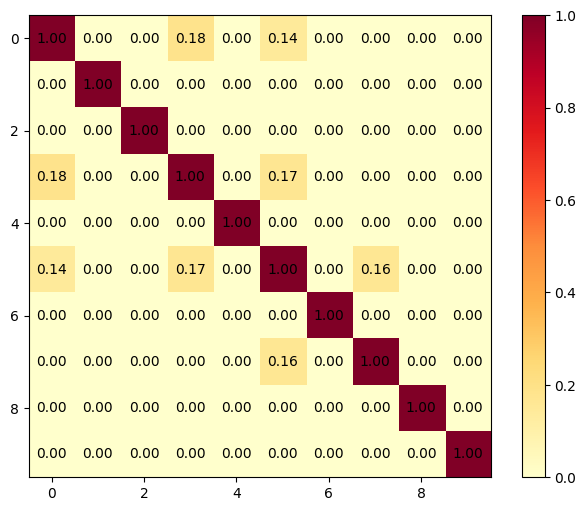

In [152]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(sim_matrix, cmap='YlOrRd')

for i in range(len(documents)):
    for j in range(len(documents)):
        ax.text(j, i, f"{sim_matrix[i,j,]:.2f}", ha='center', va='center')
plt.colorbar(im)
plt.show()

In [153]:
def cosine_sim(vec1, vec2):
    dot = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return dot / (norm1 * norm2)

In [154]:
a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([3,2,1])
d = np.array([-1,-2,-3])

In [155]:
cosine_sim(a,b), cosine_sim(a,c), cosine_sim(a,b)

(np.float64(1.0), np.float64(0.7142857142857143), np.float64(1.0))